In [1]:
import os
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
from PIL import Image
from torch.optim import Adam

from splat.custom_pytorch_implementation.create_image_auto import (
    Camera,
    create_image_full_auto_multiple_gaussians_with_splat_gaussians,
)
from splat.custom_pytorch_implementation.create_image_custom import (
    create_image_full_custom_multiple_gaussians_with_splat_gaussians,
)
from splat.gaussians import Gaussians
from splat.render_engine.gaussianScene2 import GaussianScene2


def return_gaussians() -> Gaussians:
    """
    Creates a set of Gaussian parameters as nn.Parameters. 
    These parameters are used to build a Gaussian scene and will be optimized.
    
    Note: Call this function only once before training so that the optimizer 
    holds persistent parameter references. Each forward pass will create a 
    fresh computation graph.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    points = torch.tensor([[0.101, 0.1001, 4.0], [0.0999, 0.0999, 4.1]], dtype=torch.float32, device=device)
    colors = torch.tensor([[0.4, 0.6, 0.8], [0.1, 0.15, 0.2]], dtype=torch.float32, device=device)
    scales = torch.tensor([[0.1, 0.15, 0.2], [0.2, 0.16, 0.1]], dtype=torch.float32, device=device)
    quaternions = torch.tensor([[0.5, 0.02, 0.03, 0.001], [0.2, 0.04, 0.03, 0.001]], dtype=torch.float32, device=device)
    opacity = torch.tensor([0.5, 0.9], dtype=torch.float32, device=device)
    
    gaussians = Gaussians(
        points=points,
        colors=colors,
        scales=scales,
        quaternions=quaternions,
        opacity=opacity,
        requires_grad=True
    )
    
    return gaussians


def return_camera() -> Camera:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    focal_x = torch.tensor([100.0], device=device, dtype=torch.float32)
    focal_y = torch.tensor([100.0], device=device, dtype=torch.float32)
    width = 32
    height = 32
    camera_rotation = torch.tensor([1, 0, 0, 0], device=device, dtype=torch.float32).unsqueeze(0)
    camera_translation = torch.tensor([[-0.1, -0.1, 0.0]], device=device, dtype=torch.float32)

    return Camera(
        focal_x=focal_x,
        focal_y=focal_y,
        c_x=0.0,
        c_y=0.0,
        width=width,
        height=height,
        camera_rotation=camera_rotation,
        camera_translation=camera_translation,
        device=device
    )


def return_gt_image() -> torch.Tensor:
    gt_image = Image.open("../custom_pytorch_implementation/gt.png")
    gt_image = np.array(gt_image) / 255.0
    gt_image = torch.tensor(gt_image).float()
    return gt_image.to("cuda")


def preprocess_for_gaussian_scene(camera: Camera, gaussian_scene: GaussianScene2) -> Gaussians:
    extrinsic_matrix = camera.extrinsic_matrix
    intrinsic_matrix = camera.intrinsic_matrix
    focal_x = camera.focal_x
    focal_y = camera.focal_y
    width = camera.width
    height = camera.height
    tile_size = 16
    preprocessed_gaussians = gaussian_scene.preprocess(
        extrinsic_matrix=extrinsic_matrix,
        intrinsic_matrix=intrinsic_matrix,
        focal_x=focal_x,
        focal_y=focal_y,
        width=width,
        height=height,
        tile_size=tile_size,
    )
    return preprocessed_gaussians

/home/da2986/intro_to_gaussian_splatting/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Auto

  0%|          | 0/50 [00:00<?, ?it/s]/home/da2986/intro_to_gaussian_splatting/splat/custom_pytorch_implementation/auto_functions.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return final_color, torch.tensor(current_T)


I: 0. Loss value 0.01618906483054161


  2%|▏         | 1/50 [00:02<01:43,  2.11s/it]

I: 1. Loss value 0.01998605579137802


  4%|▍         | 2/50 [00:03<01:20,  1.67s/it]

I: 2. Loss value 0.01844169944524765


  6%|▌         | 3/50 [00:04<01:12,  1.54s/it]

I: 3. Loss value 0.015570840798318386


  8%|▊         | 4/50 [00:06<01:08,  1.49s/it]

I: 4. Loss value 0.014558754861354828


 10%|█         | 5/50 [00:07<01:06,  1.48s/it]

I: 5. Loss value 0.007656083907932043


 12%|█▏        | 6/50 [00:09<01:05,  1.49s/it]

I: 6. Loss value 0.010975882411003113


 14%|█▍        | 7/50 [00:10<01:04,  1.49s/it]

I: 7. Loss value 0.01234724372625351


 16%|█▌        | 8/50 [00:12<01:00,  1.45s/it]

I: 8. Loss value 0.009772347286343575


 18%|█▊        | 9/50 [00:13<00:58,  1.42s/it]

I: 9. Loss value 0.00865640863776207


 20%|██        | 10/50 [00:14<00:55,  1.40s/it]

I: 10. Loss value 0.01089880894869566


 22%|██▏       | 11/50 [00:16<00:53,  1.38s/it]

I: 11. Loss value 0.010082813911139965


 24%|██▍       | 12/50 [00:17<00:52,  1.37s/it]

I: 12. Loss value 0.007368808146566153


 26%|██▌       | 13/50 [00:18<00:50,  1.36s/it]

I: 13. Loss value 0.008480804041028023


 28%|██▊       | 14/50 [00:20<00:48,  1.33s/it]

I: 14. Loss value 0.009648559615015984


 30%|███       | 15/50 [00:21<00:45,  1.31s/it]

I: 15. Loss value 0.00778244948014617


 32%|███▏      | 16/50 [00:22<00:43,  1.28s/it]

I: 16. Loss value 0.006764516234397888


 34%|███▍      | 17/50 [00:23<00:42,  1.27s/it]

I: 17. Loss value 0.008198111318051815


 36%|███▌      | 18/50 [00:25<00:40,  1.27s/it]

I: 18. Loss value 0.007839741185307503


 38%|███▊      | 19/50 [00:26<00:39,  1.27s/it]

I: 19. Loss value 0.006377967074513435


 40%|████      | 20/50 [00:27<00:37,  1.26s/it]

I: 20. Loss value 0.006771422456949949


 42%|████▏     | 21/50 [00:28<00:36,  1.26s/it]

I: 21. Loss value 0.007160133682191372


 44%|████▍     | 22/50 [00:30<00:34,  1.25s/it]

I: 22. Loss value 0.0062881456688046455


 46%|████▌     | 23/50 [00:31<00:33,  1.24s/it]

I: 23. Loss value 0.005974125117063522


 48%|████▊     | 24/50 [00:32<00:32,  1.24s/it]

I: 24. Loss value 0.006230670027434826


 50%|█████     | 25/50 [00:33<00:31,  1.25s/it]

I: 25. Loss value 0.005928882863372564


 52%|█████▏    | 26/50 [00:35<00:30,  1.25s/it]

I: 26. Loss value 0.005568410269916058


 54%|█████▍    | 27/50 [00:36<00:28,  1.25s/it]

I: 27. Loss value 0.005456709768623114


 56%|█████▌    | 28/50 [00:37<00:27,  1.25s/it]

I: 28. Loss value 0.005369092803448439


 58%|█████▊    | 29/50 [00:38<00:26,  1.26s/it]

I: 29. Loss value 0.005219136830419302


 60%|██████    | 30/50 [00:40<00:25,  1.27s/it]

I: 30. Loss value 0.004885929636657238


 62%|██████▏   | 31/50 [00:41<00:24,  1.27s/it]

I: 31. Loss value 0.004790999460965395


 64%|██████▍   | 32/50 [00:42<00:22,  1.28s/it]

I: 32. Loss value 0.004821966402232647


 66%|██████▌   | 33/50 [00:43<00:21,  1.28s/it]

I: 33. Loss value 0.004419336095452309


 68%|██████▊   | 34/50 [00:45<00:20,  1.28s/it]

I: 34. Loss value 0.004291763063520193


 70%|███████   | 35/50 [00:46<00:19,  1.28s/it]

I: 35. Loss value 0.004391043446958065


 72%|███████▏  | 36/50 [00:47<00:18,  1.29s/it]

I: 36. Loss value 0.003989160060882568


 74%|███████▍  | 37/50 [00:49<00:16,  1.30s/it]

I: 37. Loss value 0.0038816630840301514


 76%|███████▌  | 38/50 [00:50<00:15,  1.30s/it]

I: 38. Loss value 0.003952739294618368


 78%|███████▊  | 39/50 [00:51<00:14,  1.30s/it]

I: 39. Loss value 0.003588741645216942


 80%|████████  | 40/50 [00:53<00:13,  1.31s/it]

I: 40. Loss value 0.003534098621457815


 82%|████████▏ | 41/50 [00:54<00:11,  1.31s/it]

I: 41. Loss value 0.003522395621985197


 84%|████████▍ | 42/50 [00:55<00:10,  1.31s/it]

I: 42. Loss value 0.003234650706872344


 86%|████████▌ | 43/50 [00:57<00:09,  1.32s/it]

I: 43. Loss value 0.003212348558008671


 88%|████████▊ | 44/50 [00:58<00:07,  1.33s/it]

I: 44. Loss value 0.003120778826996684


 90%|█████████ | 45/50 [00:59<00:06,  1.33s/it]

I: 45. Loss value 0.002934202551841736


 92%|█████████▏| 46/50 [01:01<00:05,  1.34s/it]

I: 46. Loss value 0.002888315822929144


 94%|█████████▍| 47/50 [01:02<00:04,  1.34s/it]

I: 47. Loss value 0.002779003931209445


 96%|█████████▌| 48/50 [01:03<00:02,  1.35s/it]

I: 48. Loss value 0.002658820478245616


 98%|█████████▊| 49/50 [01:05<00:01,  1.36s/it]

I: 49. Loss value 0.002578723942860961


100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


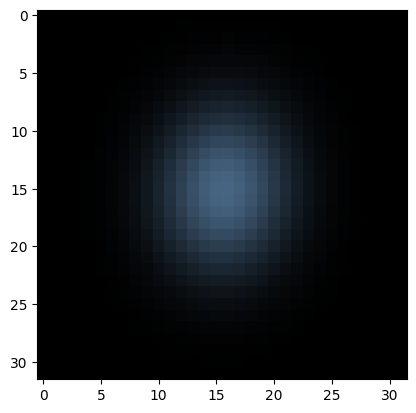

In [2]:
camera = return_camera()
gaussians = return_gaussians()
gt_image = return_gt_image()

optimizer = Adam([
    gaussians.points,
    gaussians.colors,
    gaussians.scales,
    gaussians.quaternions,
    gaussians.opacity,
], lr=0.001)
loss = torch.nn.MSELoss()
pbar = tqdm.tqdm(range(50))
for i in pbar:
    output_auto1 = create_image_full_auto_multiple_gaussians_with_splat_gaussians(
        camera, gaussians, camera.height, camera.width, verbose=False
    )
    loss_value = loss(output_auto1, gt_image.float())
    print(f"I: {i}. Loss value", loss_value.item())
    loss_value.backward()
    optimizer.step()
    optimizer.zero_grad(set_to_none=True)

plt.imshow(output_auto1.detach().cpu().numpy())
plt.show()



# Custom

  2%|▏         | 1/50 [00:02<01:54,  2.33s/it]

I: 0. Loss value 0.01618906483054161


  4%|▍         | 2/50 [00:04<01:54,  2.39s/it]

I: 1. Loss value 0.01998605579137802


  6%|▌         | 3/50 [00:07<01:52,  2.38s/it]

I: 2. Loss value 0.01844169944524765


  8%|▊         | 4/50 [00:09<01:49,  2.37s/it]

I: 3. Loss value 0.015570840798318386


 10%|█         | 5/50 [00:11<01:47,  2.39s/it]

I: 4. Loss value 0.014558754861354828


 12%|█▏        | 6/50 [00:14<01:46,  2.42s/it]

I: 5. Loss value 0.007656083907932043


 14%|█▍        | 7/50 [00:16<01:43,  2.41s/it]

I: 6. Loss value 0.010975882411003113


 16%|█▌        | 8/50 [00:19<01:41,  2.41s/it]

I: 7. Loss value 0.01234724372625351


 18%|█▊        | 9/50 [00:21<01:38,  2.40s/it]

I: 8. Loss value 0.009772347286343575


 20%|██        | 10/50 [00:24<01:36,  2.42s/it]

I: 9. Loss value 0.008656409569084644


 22%|██▏       | 11/50 [00:26<01:34,  2.42s/it]

I: 10. Loss value 0.01089880894869566


 24%|██▍       | 12/50 [00:28<01:31,  2.41s/it]

I: 11. Loss value 0.01008281297981739


 26%|██▌       | 13/50 [00:31<01:29,  2.41s/it]

I: 12. Loss value 0.007368808146566153


 28%|██▊       | 14/50 [00:33<01:26,  2.40s/it]

I: 13. Loss value 0.008480804041028023


 30%|███       | 15/50 [00:36<01:24,  2.43s/it]

I: 14. Loss value 0.009648559615015984


 32%|███▏      | 16/50 [00:38<01:22,  2.41s/it]

I: 15. Loss value 0.00778244948014617


 34%|███▍      | 17/50 [00:40<01:19,  2.41s/it]

I: 16. Loss value 0.006764516234397888


 36%|███▌      | 18/50 [00:43<01:16,  2.41s/it]

I: 17. Loss value 0.008198111318051815


 38%|███▊      | 19/50 [00:45<01:15,  2.42s/it]

I: 18. Loss value 0.007839741185307503


 40%|████      | 20/50 [00:48<01:12,  2.41s/it]

I: 19. Loss value 0.006377967074513435


 42%|████▏     | 21/50 [00:50<01:09,  2.40s/it]

I: 20. Loss value 0.006771421991288662


 44%|████▍     | 22/50 [00:52<01:07,  2.41s/it]

I: 21. Loss value 0.007160133682191372


 46%|████▌     | 23/50 [00:55<01:04,  2.40s/it]

I: 22. Loss value 0.0062881456688046455


 48%|████▊     | 24/50 [00:57<01:02,  2.39s/it]

I: 23. Loss value 0.005974125117063522


 50%|█████     | 25/50 [01:00<00:59,  2.39s/it]

I: 24. Loss value 0.006230670027434826


 52%|█████▏    | 26/50 [01:02<00:57,  2.39s/it]

I: 25. Loss value 0.005928882863372564


 54%|█████▍    | 27/50 [01:04<00:55,  2.41s/it]

I: 26. Loss value 0.005568410269916058


 56%|█████▌    | 28/50 [01:07<00:52,  2.40s/it]

I: 27. Loss value 0.005456709768623114


 58%|█████▊    | 29/50 [01:09<00:50,  2.39s/it]

I: 28. Loss value 0.005369092803448439


 60%|██████    | 30/50 [01:12<00:48,  2.40s/it]

I: 29. Loss value 0.005219136830419302


 62%|██████▏   | 31/50 [01:14<00:45,  2.42s/it]

I: 30. Loss value 0.004885929636657238


 64%|██████▍   | 32/50 [01:16<00:43,  2.40s/it]

I: 31. Loss value 0.004790999460965395


 66%|██████▌   | 33/50 [01:19<00:40,  2.40s/it]

I: 32. Loss value 0.004821966402232647


 68%|██████▊   | 34/50 [01:21<00:38,  2.41s/it]

I: 33. Loss value 0.004419336095452309


 70%|███████   | 35/50 [01:24<00:36,  2.40s/it]

I: 34. Loss value 0.004291763063520193


 72%|███████▏  | 36/50 [01:26<00:33,  2.40s/it]

I: 35. Loss value 0.00439104251563549


 74%|███████▍  | 37/50 [01:28<00:31,  2.39s/it]

I: 36. Loss value 0.003989160060882568


 76%|███████▌  | 38/50 [01:31<00:28,  2.39s/it]

I: 37. Loss value 0.0038816630840301514


 78%|███████▊  | 39/50 [01:33<00:26,  2.41s/it]

I: 38. Loss value 0.003952739294618368


 80%|████████  | 40/50 [01:36<00:24,  2.40s/it]

I: 39. Loss value 0.003588741645216942


 82%|████████▏ | 41/50 [01:38<00:21,  2.40s/it]

I: 40. Loss value 0.003534098621457815


 84%|████████▍ | 42/50 [01:40<00:19,  2.39s/it]

I: 41. Loss value 0.0035223960876464844


 86%|████████▌ | 43/50 [01:43<00:16,  2.41s/it]

I: 42. Loss value 0.0032346497755497694


 88%|████████▊ | 44/50 [01:45<00:14,  2.39s/it]

I: 43. Loss value 0.003212348325178027


 90%|█████████ | 45/50 [01:48<00:11,  2.38s/it]

I: 44. Loss value 0.003120778128504753


 92%|█████████▏| 46/50 [01:50<00:09,  2.40s/it]

I: 45. Loss value 0.002934203250333667


 94%|█████████▍| 47/50 [01:52<00:07,  2.39s/it]

I: 46. Loss value 0.002888315822929144


 96%|█████████▌| 48/50 [01:55<00:04,  2.38s/it]

I: 47. Loss value 0.0027790036983788013


 98%|█████████▊| 49/50 [01:57<00:02,  2.38s/it]

I: 48. Loss value 0.002658820478245616


100%|██████████| 50/50 [01:59<00:00,  2.40s/it]

I: 49. Loss value 0.0025787237100303173


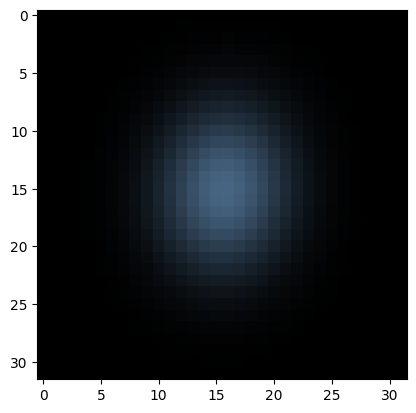

In [3]:
camera = return_camera()
gaussians = return_gaussians()
gaussians.points.retain_grad()
gt_image = return_gt_image()

optimizer = Adam([
    gaussians.points,
    gaussians.colors,
    gaussians.scales,
    gaussians.quaternions,
    gaussians.opacity,
], lr=0.001)
loss = torch.nn.MSELoss()
pbar = tqdm.tqdm(range(50))

for i in pbar:
    output_custom1 = create_image_full_custom_multiple_gaussians_with_splat_gaussians(
        camera, gaussians, camera.height, camera.width, verbose=False
    )
    loss_value = loss(output_custom1, gt_image.float())
    loss_value.backward()
    print(f"I: {i}. Loss value", loss_value.item())
    optimizer.step()
    optimizer.zero_grad(set_to_none=True)

plt.imshow(output_custom1.detach().cpu().numpy())
plt.show()

# In CUDA

  2%|▏         | 8/500 [00:00<00:06, 73.30it/s]

I: 0. Loss value 0.01618906483054161
I: 1. Loss value 0.01998605765402317
I: 2. Loss value 0.01844169944524765
I: 3. Loss value 0.015570840798318386
I: 4. Loss value 0.014558754861354828
I: 5. Loss value 0.007656083442270756
I: 6. Loss value 0.010975880548357964
I: 7. Loss value 0.01234724372625351
I: 8. Loss value 0.009772345423698425
I: 9. Loss value 0.008656419813632965
I: 10. Loss value 0.010898808017373085
I: 11. Loss value 0.010088833048939705
I: 12. Loss value 0.007374703884124756
I: 13. Loss value 0.00848398543894291
I: 14. Loss value 0.009649748913943768


  5%|▍         | 24/500 [00:00<00:06, 74.69it/s]

I: 15. Loss value 0.0077829016372561455
I: 16. Loss value 0.006764640565961599
I: 17. Loss value 0.008198138326406479
I: 18. Loss value 0.007839737460017204
I: 19. Loss value 0.006377965211868286
I: 20. Loss value 0.006771422922611237
I: 21. Loss value 0.007160193286836147
I: 22. Loss value 0.0062881456688046455
I: 23. Loss value 0.005974178668111563
I: 24. Loss value 0.006230724975466728
I: 25. Loss value 0.005928882863372564
I: 26. Loss value 0.005568456836044788
I: 27. Loss value 0.00545676052570343
I: 28. Loss value 0.005369092803448439
I: 29. Loss value 0.005219179205596447


  8%|▊         | 40/500 [00:00<00:06, 75.72it/s]

I: 30. Loss value 0.004885929636657238
I: 31. Loss value 0.004790999460965395
I: 32. Loss value 0.00482196593657136
I: 33. Loss value 0.004419337492436171
I: 34. Loss value 0.004291763063520193
I: 35. Loss value 0.004391082562506199
I: 36. Loss value 0.003989160992205143
I: 37. Loss value 0.0038816644810140133
I: 38. Loss value 0.0039527746848762035
I: 39. Loss value 0.0035887432750314474
I: 40. Loss value 0.00353412376716733
I: 41. Loss value 0.0035223965533077717
I: 42. Loss value 0.003234651405364275
I: 43. Loss value 0.0032123501878231764
I: 44. Loss value 0.003120794426649809
I: 45. Loss value 0.002934202551841736


 11%|█         | 56/500 [00:00<00:05, 75.72it/s]

I: 46. Loss value 0.002888338640332222
I: 47. Loss value 0.002779004629701376
I: 48. Loss value 0.0026588428299874067
I: 49. Loss value 0.0025787486229091883
I: 50. Loss value 0.0025012807454913855
I: 51. Loss value 0.002383497543632984
I: 52. Loss value 0.0023201508447527885
I: 53. Loss value 0.0022483589127659798
I: 54. Loss value 0.0021338060032576323
I: 55. Loss value 0.0021084812469780445
I: 56. Loss value 0.002001184970140457
I: 57. Loss value 0.00194503681268543
I: 58. Loss value 0.001896945177577436
I: 59. Loss value 0.0018036318942904472
I: 60. Loss value 0.001780570251867175


 14%|█▍        | 72/500 [00:00<00:05, 75.36it/s]

I: 61. Loss value 0.001700368244200945
I: 62. Loss value 0.0016600880771875381
I: 63. Loss value 0.0016119936481118202
I: 64. Loss value 0.0015579548198729753
I: 65. Loss value 0.0015229505952447653
I: 66. Loss value 0.0014765056548640132
I: 67. Loss value 0.0014386249240487814
I: 68. Loss value 0.001404479844495654
I: 69. Loss value 0.0013668317114934325
I: 70. Loss value 0.0013362288009375334
I: 71. Loss value 0.0013068526750430465
I: 72. Loss value 0.0012737284414470196
I: 73. Loss value 0.0012535372516140342
I: 74. Loss value 0.0012195899616926908
I: 75. Loss value 0.001203735708259046
I: 76. Loss value 0.0011736034648492932


 18%|█▊        | 88/500 [00:01<00:05, 75.58it/s]

I: 77. Loss value 0.0011572485091164708
I: 78. Loss value 0.0011332910507917404
I: 79. Loss value 0.0011150249047204852
I: 80. Loss value 0.0010963580571115017
I: 81. Loss value 0.0010774233378469944
I: 82. Loss value 0.0010617290390655398
I: 83. Loss value 0.0010437911842018366
I: 84. Loss value 0.0010292218066751957
I: 85. Loss value 0.0010132112074643373
I: 86. Loss value 0.000998839270323515
I: 87. Loss value 0.0009848277550190687
I: 88. Loss value 0.0009705411503091455
I: 89. Loss value 0.0009581072954460979
I: 90. Loss value 0.0009440974099561572
I: 91. Loss value 0.0009327292209491134


 21%|██        | 104/500 [00:01<00:05, 75.83it/s]

I: 92. Loss value 0.0009193049045279622
I: 93. Loss value 0.000908571935724467
I: 94. Loss value 0.0008958722464740276
I: 95. Loss value 0.000885580200701952
I: 96. Loss value 0.0008736284798942506
I: 97. Loss value 0.0008636643178761005
I: 98. Loss value 0.0008524472359567881
I: 99. Loss value 0.0008427962893620133
I: 100. Loss value 0.0008322404464706779
I: 101. Loss value 0.0008228967781178653
I: 102. Loss value 0.000812942162156105
I: 103. Loss value 0.0008039066451601684
I: 104. Loss value 0.0007944611716084182
I: 105. Loss value 0.0007857412565499544
I: 106. Loss value 0.0007767819333821535
I: 107. Loss value 0.0007683724979870021


 24%|██▍       | 120/500 [00:01<00:04, 76.04it/s]

I: 108. Loss value 0.0007598452502861619
I: 109. Loss value 0.000751737505197525
I: 110. Loss value 0.0007435971638187766
I: 111. Loss value 0.0007357720169238746
I: 112. Loss value 0.0007279856945388019
I: 113. Loss value 0.0007204362191259861
I: 114. Loss value 0.0007129582809284329
I: 115. Loss value 0.0007056797621771693
I: 116. Loss value 0.0006984630017541349
I: 117. Loss value 0.0006914357654750347
I: 118. Loss value 0.000684460042975843
I: 119. Loss value 0.0006776680238544941
I: 120. Loss value 0.0006708942237310112
I: 121. Loss value 0.0006643172237090766
I: 122. Loss value 0.0006577282911166549
I: 123. Loss value 0.0006513491971418262


 27%|██▋       | 136/500 [00:01<00:04, 76.20it/s]

I: 124. Loss value 0.0006449429783970118
I: 125. Loss value 0.0006387221510522068
I: 126. Loss value 0.0006325010326690972
I: 127. Loss value 0.0006264217081479728
I: 128. Loss value 0.0006203736993484199
I: 129. Loss value 0.0006144214421510696
I: 130. Loss value 0.0006085375207476318
I: 131. Loss value 0.0006027045892551541
I: 132. Loss value 0.000596970203332603
I: 133. Loss value 0.0005912580527365208
I: 134. Loss value 0.0005856557982042432
I: 135. Loss value 0.0005800703074783087
I: 136. Loss value 0.0005745834205299616
I: 137. Loss value 0.0005691288388334215
I: 138. Loss value 0.0005637469002977014
I: 139. Loss value 0.0005584207247011364


 30%|███       | 152/500 [00:02<00:04, 76.19it/s]

I: 140. Loss value 0.0005531419883482158
I: 141. Loss value 0.0005479353712871671
I: 142. Loss value 0.0005427642608992755
I: 143. Loss value 0.0005376661429181695
I: 144. Loss value 0.0005326070822775364
I: 145. Loss value 0.0005276093143038452
I: 146. Loss value 0.0005226618377491832
I: 147. Loss value 0.000517762266099453
I: 148. Loss value 0.0005129207274876535
I: 149. Loss value 0.0005081211565993726
I: 150. Loss value 0.000503378629218787
I: 151. Loss value 0.0004986801068298519
I: 152. Loss value 0.0004940320504829288
I: 153. Loss value 0.0004894327139481902
I: 154. Loss value 0.00048487784806638956
I: 155. Loss value 0.0004803727788385004


 34%|███▎      | 168/500 [00:02<00:04, 76.10it/s]

I: 156. Loss value 0.0004759108123835176
I: 157. Loss value 0.00047149634337984025
I: 158. Loss value 0.00046712555922567844
I: 159. Loss value 0.0004627990419976413
I: 160. Loss value 0.00045851696631871164
I: 161. Loss value 0.00045427674194797873
I: 162. Loss value 0.00045007996959611773
I: 163. Loss value 0.0004459243209566921
I: 164. Loss value 0.00044181017437949777
I: 165. Loss value 0.0004377372970338911
I: 166. Loss value 0.00043370420462451875
I: 167. Loss value 0.00042971139191649854
I: 168. Loss value 0.00042575725819915533
I: 169. Loss value 0.0004218422691337764
I: 170. Loss value 0.0004179655516054481


 37%|███▋      | 184/500 [00:02<00:04, 75.08it/s]

I: 171. Loss value 0.0004141122044529766
I: 172. Loss value 0.00041029718704521656
I: 173. Loss value 0.0004065320536028594
I: 174. Loss value 0.00040280315442942083
I: 175. Loss value 0.00039911072235554457
I: 176. Loss value 0.0003954530111514032
I: 177. Loss value 0.00039183092303574085
I: 178. Loss value 0.00038824311923235655
I: 179. Loss value 0.0003846893960144371
I: 180. Loss value 0.0003811697824858129
I: 181. Loss value 0.00037768296897411346
I: 182. Loss value 0.0003742293338291347
I: 183. Loss value 0.0003708084113895893
I: 184. Loss value 0.00036741906660608947
I: 185. Loss value 0.0003640620852820575


 40%|████      | 200/500 [00:02<00:03, 75.23it/s]

I: 186. Loss value 0.0003607362450566143
I: 187. Loss value 0.0003574412548914552
I: 188. Loss value 0.00035417708568274975
I: 189. Loss value 0.00035094330087304115
I: 190. Loss value 0.0003477392892818898
I: 191. Loss value 0.0003445648471824825
I: 192. Loss value 0.0003414197126403451
I: 193. Loss value 0.0003383031580597162
I: 194. Loss value 0.0003352153580635786
I: 195. Loss value 0.0003321558178868145
I: 196. Loss value 0.0003291242173872888
I: 197. Loss value 0.0003261202364228666
I: 198. Loss value 0.00032314343843609095
I: 199. Loss value 0.00032019353238865733
I: 200. Loss value 0.0003172704018652439
I: 201. Loss value 0.0003143736976198852


 43%|████▎     | 216/500 [00:02<00:03, 75.25it/s]

I: 202. Loss value 0.0003115029539912939
I: 203. Loss value 0.00030865834560245275
I: 204. Loss value 0.0003058388829231262
I: 205. Loss value 0.0003030446241609752
I: 206. Loss value 0.0003002754820045084
I: 207. Loss value 0.00029753096168860793
I: 208. Loss value 0.0002948108594864607
I: 209. Loss value 0.0002921147970482707
I: 210. Loss value 0.00028944271616637707
I: 211. Loss value 0.0002867942093871534
I: 212. Loss value 0.00028416927671059966
I: 213. Loss value 0.000281567161437124
I: 214. Loss value 0.0002789884165395051
I: 215. Loss value 0.00027643179055303335
I: 216. Loss value 0.0002738980110734701


 46%|████▋     | 232/500 [00:03<00:03, 75.12it/s]

I: 217. Loss value 0.0002713860012590885
I: 218. Loss value 0.00026889631408266723
I: 219. Loss value 0.0002664280473254621
I: 220. Loss value 0.00026398157933726907
I: 221. Loss value 0.0002615561243146658
I: 222. Loss value 0.00025915176956914365
I: 223. Loss value 0.0002567685442045331
I: 224. Loss value 0.0002544057497289032
I: 225. Loss value 0.00025206358986906707
I: 226. Loss value 0.0002497416571713984
I: 227. Loss value 0.0002474396605975926
I: 228. Loss value 0.00024515739642083645
I: 229. Loss value 0.00024289479188155383
I: 230. Loss value 0.00024065189063549042
I: 231. Loss value 0.00023842800874263048
I: 232. Loss value 0.00023622342268936336


 50%|████▉     | 248/500 [00:03<00:03, 75.29it/s]

I: 233. Loss value 0.00023403731756843626
I: 234. Loss value 0.00023187055194284767
I: 235. Loss value 0.0002297218597959727
I: 236. Loss value 0.00022756383987143636
I: 237. Loss value 0.00022545189131051302
I: 238. Loss value 0.00022335804533213377
I: 239. Loss value 0.00022126802650745958
I: 240. Loss value 0.00021920973085798323
I: 241. Loss value 0.00021715501497965306
I: 242. Loss value 0.0002151319495169446
I: 243. Loss value 0.00021312583703547716
I: 244. Loss value 0.0002111369976773858
I: 245. Loss value 0.00020916489302180707
I: 246. Loss value 0.00020719561143778265
I: 247. Loss value 0.0002052569470833987


 51%|█████     | 256/500 [00:03<00:03, 75.24it/s]

I: 248. Loss value 0.0002033209166256711
I: 249. Loss value 0.00020141503773629665
I: 250. Loss value 0.00019951871945522726
I: 251. Loss value 0.00019762414740398526
I: 252. Loss value 0.00019576659542508423
I: 253. Loss value 0.00019392473041079938
I: 254. Loss value 0.00019209866877645254
I: 255. Loss value 0.0001902881485875696
I: 256. Loss value 0.00018849302432499826
I: 257. Loss value 0.00018671303405426443
I: 258. Loss value 0.0001849481777753681
I: 259. Loss value 0.00018319841183256358
I: 260. Loss value 0.00018146343063563108
I: 261. Loss value 0.00017974292859435081
I: 262. Loss value 0.00017803744412958622
I: 263. Loss value 0.0001763461623340845


 54%|█████▍    | 272/500 [00:03<00:03, 74.96it/s]

I: 264. Loss value 0.00017466935969423503
I: 265. Loss value 0.0001730068470351398
I: 266. Loss value 0.0001713583478704095
I: 267. Loss value 0.0001697241677902639
I: 268. Loss value 0.00016810349188745022
I: 269. Loss value 0.00016649678582325578
I: 270. Loss value 0.00016490368579979986
I: 271. Loss value 0.00016332432278431952
I: 272. Loss value 0.00016175833297893405
I: 273. Loss value 0.00016020576003938913
I: 274. Loss value 0.00015866640023887157
I: 275. Loss value 0.0001571400644024834
I: 276. Loss value 0.0001556268980493769
I: 277. Loss value 0.00015412672655656934
I: 278. Loss value 0.00015263937530107796


 58%|█████▊    | 288/500 [00:03<00:02, 75.40it/s]

I: 279. Loss value 0.00015116468421183527
I: 280. Loss value 0.00014970250776968896
I: 281. Loss value 0.0001482529187342152
I: 282. Loss value 0.0001468159316573292
I: 283. Loss value 0.00014539102267008275
I: 284. Loss value 0.00014397845370694995
I: 285. Loss value 0.00014257818111218512
I: 286. Loss value 0.00014118988474365324
I: 287. Loss value 0.00013981355004943907
I: 288. Loss value 0.00013844894419889897
I: 289. Loss value 0.00013709634367842227
I: 290. Loss value 0.00013575531193055212
I: 291. Loss value 0.0001344259362667799
I: 292. Loss value 0.00013310815847944468
I: 293. Loss value 0.00013180170208215714
I: 294. Loss value 0.00013050666893832386


 61%|██████    | 304/500 [00:04<00:02, 75.50it/s]

I: 295. Loss value 0.00012922279711347073
I: 296. Loss value 0.00012795004295185208
I: 297. Loss value 0.0001266884501092136
I: 298. Loss value 0.00012543790217023343
I: 299. Loss value 0.00012419832637533545
I: 300. Loss value 0.00012296941713429987
I: 301. Loss value 0.00012175121810287237
I: 302. Loss value 0.00012054372200509533
I: 303. Loss value 0.00011934708891203627
I: 304. Loss value 0.00011816067853942513
I: 305. Loss value 0.00011698481830535457
I: 306. Loss value 0.00011581933358684182
I: 307. Loss value 0.00011466393334558234
I: 308. Loss value 0.00011351883586030453
I: 309. Loss value 0.00011238391743972898


 64%|██████▍   | 320/500 [00:04<00:02, 75.71it/s]

I: 310. Loss value 0.00011125908349640667
I: 311. Loss value 0.0001101442176150158
I: 312. Loss value 0.00010903907241299748
I: 313. Loss value 0.00010794398258440197
I: 314. Loss value 0.00010685842426028103
I: 315. Loss value 0.00010578264482319355
I: 316. Loss value 0.00010471653513377532
I: 317. Loss value 0.0001036598114296794
I: 318. Loss value 0.00010261252464260906
I: 319. Loss value 0.00010157471842831001
I: 320. Loss value 0.00010054630547529086
I: 321. Loss value 9.95269074337557e-05
I: 322. Loss value 9.851681534200907e-05
I: 323. Loss value 9.751570178195834e-05
I: 324. Loss value 9.652390144765377e-05
I: 325. Loss value 9.55408249865286e-05


 67%|██████▋   | 336/500 [00:04<00:02, 75.39it/s]

I: 326. Loss value 9.456690168008208e-05
I: 327. Loss value 9.360164403915405e-05
I: 328. Loss value 9.264516847906634e-05
I: 329. Loss value 9.169746044790372e-05
I: 330. Loss value 9.075822163140401e-05
I: 331. Loss value 8.982756116893142e-05
I: 332. Loss value 8.890562457963824e-05
I: 333. Loss value 8.799195347819477e-05
I: 334. Loss value 8.708650420885533e-05
I: 335. Loss value 8.618958236183971e-05
I: 336. Loss value 8.530088234692812e-05
I: 337. Loss value 8.442036050837487e-05
I: 338. Loss value 8.354792225873098e-05
I: 339. Loss value 8.268348028650507e-05
I: 340. Loss value 8.182712190318853e-05


 70%|███████   | 352/500 [00:04<00:01, 75.04it/s]

I: 341. Loss value 8.097871614154428e-05
I: 342. Loss value 8.013819751795381e-05
I: 343. Loss value 7.93054059613496e-05
I: 344. Loss value 7.848042150726542e-05
I: 345. Loss value 7.766313501633704e-05
I: 346. Loss value 7.685334276175126e-05
I: 347. Loss value 7.605129212606698e-05
I: 348. Loss value 7.52566775190644e-05
I: 349. Loss value 7.44546705391258e-05
I: 350. Loss value 7.367497164523229e-05
I: 351. Loss value 7.288777123903856e-05
I: 352. Loss value 7.212274795165285e-05
I: 353. Loss value 7.136481144698337e-05
I: 354. Loss value 7.061415817588568e-05
I: 355. Loss value 6.987062079133466e-05
I: 356. Loss value 6.913414836162701e-05


 74%|███████▎  | 368/500 [00:04<00:01, 74.90it/s]

I: 357. Loss value 6.840471178293228e-05
I: 358. Loss value 6.766719889128581e-05
I: 359. Loss value 6.695165211567655e-05
I: 360. Loss value 6.622800719924271e-05
I: 361. Loss value 6.552611012011766e-05
I: 362. Loss value 6.483080505859107e-05
I: 363. Loss value 6.414233212126419e-05
I: 364. Loss value 6.346042937366292e-05
I: 365. Loss value 6.278509681578726e-05
I: 366. Loss value 6.211630534380674e-05
I: 367. Loss value 6.14539603702724e-05
I: 368. Loss value 6.0797930927947164e-05
I: 369. Loss value 6.014831524225883e-05
I: 370. Loss value 5.9504935052245855e-05
I: 371. Loss value 5.8867990446742624e-05


 77%|███████▋  | 384/500 [00:05<00:01, 75.38it/s]

I: 372. Loss value 5.823697938467376e-05
I: 373. Loss value 5.7612411183072254e-05
I: 374. Loss value 5.699388566426933e-05
I: 375. Loss value 5.638142101815902e-05
I: 376. Loss value 5.575998511631042e-05
I: 377. Loss value 5.515933662536554e-05
I: 378. Loss value 5.456470535136759e-05
I: 379. Loss value 5.396107007982209e-05
I: 380. Loss value 5.337808033800684e-05
I: 381. Loss value 5.2786021115025505e-05
I: 382. Loss value 5.221461469773203e-05
I: 383. Loss value 5.164887988939881e-05
I: 384. Loss value 5.107375545776449e-05
I: 385. Loss value 5.051915650255978e-05
I: 386. Loss value 4.9970258260145783e-05
I: 387. Loss value 4.942677333019674e-05


 80%|████████  | 400/500 [00:05<00:01, 75.78it/s]

I: 388. Loss value 4.888865441898815e-05
I: 389. Loss value 4.835597792407498e-05
I: 390. Loss value 4.782862379215658e-05
I: 391. Loss value 4.730655928142369e-05
I: 392. Loss value 4.6789842599537224e-05
I: 393. Loss value 4.627824091585353e-05
I: 394. Loss value 4.577182698994875e-05
I: 395. Loss value 4.527052442426793e-05
I: 396. Loss value 4.4774264097213745e-05
I: 397. Loss value 4.4283162424108014e-05
I: 398. Loss value 4.3796899262815714e-05
I: 399. Loss value 4.331573654781096e-05
I: 400. Loss value 4.283932503312826e-05
I: 401. Loss value 4.236785025568679e-05
I: 402. Loss value 4.1901057556970045e-05


 83%|████████▎ | 416/500 [00:05<00:01, 73.87it/s]

I: 403. Loss value 4.143929618294351e-05
I: 404. Loss value 4.09821150242351e-05
I: 405. Loss value 4.05297105317004e-05
I: 406. Loss value 4.008186442661099e-05
I: 407. Loss value 3.963876224588603e-05
I: 408. Loss value 3.9199989259941503e-05
I: 409. Loss value 3.876588380080648e-05
I: 410. Loss value 3.833630762528628e-05
I: 411. Loss value 3.7911122490186244e-05
I: 412. Loss value 3.7490332033485174e-05
I: 413. Loss value 3.707392897922546e-05
I: 414. Loss value 3.6661935155279934e-05
I: 415. Loss value 3.625409590313211e-05
I: 416. Loss value 3.585056037991308e-05
I: 417. Loss value 3.545133222360164e-05


 86%|████████▋ | 432/500 [00:05<00:00, 74.13it/s]

I: 418. Loss value 3.5056302294833586e-05
I: 419. Loss value 3.466524867690168e-05
I: 420. Loss value 3.4278491511940956e-05
I: 421. Loss value 3.389571065781638e-05
I: 422. Loss value 3.351699706399813e-05
I: 423. Loss value 3.3142285246867687e-05
I: 424. Loss value 3.277146242908202e-05
I: 425. Loss value 3.240463775000535e-05
I: 426. Loss value 3.20416220347397e-05
I: 427. Loss value 3.168254261254333e-05
I: 428. Loss value 3.132722486043349e-05
I: 429. Loss value 3.0975777917774394e-05
I: 430. Loss value 3.0628038075519726e-05
I: 431. Loss value 3.02839107462205e-05
I: 432. Loss value 2.9943585104774684e-05


 90%|████████▉ | 448/500 [00:05<00:00, 74.49it/s]

I: 433. Loss value 2.9606924726977013e-05
I: 434. Loss value 2.9273855034261942e-05
I: 435. Loss value 2.8944332370883785e-05
I: 436. Loss value 2.8572543669724837e-05
I: 437. Loss value 2.8250255127204582e-05
I: 438. Loss value 2.7916057661059313e-05
I: 439. Loss value 2.7600672183325514e-05
I: 440. Loss value 2.728879189817235e-05
I: 441. Loss value 2.6980171242030337e-05
I: 442. Loss value 2.6659783543436788e-05
I: 443. Loss value 2.634263910294976e-05
I: 444. Loss value 2.601348933239933e-05
I: 445. Loss value 2.5718363758642226e-05
I: 446. Loss value 2.5426441425224766e-05
I: 447. Loss value 2.5137724151136354e-05


 91%|█████████ | 456/500 [00:06<00:00, 74.81it/s]

I: 448. Loss value 2.4852193746482953e-05
I: 449. Loss value 2.4569808374508284e-05
I: 450. Loss value 2.429059168207459e-05
I: 451. Loss value 2.4014367227209732e-05
I: 452. Loss value 2.3741318727843463e-05
I: 453. Loss value 2.347117697354406e-05
I: 454. Loss value 2.320403655176051e-05
I: 455. Loss value 2.2939921109355055e-05
I: 456. Loss value 2.2678692403133027e-05
I: 457. Loss value 2.2420395907829516e-05
I: 458. Loss value 2.216499524365645e-05
I: 459. Loss value 2.191240491811186e-05
I: 460. Loss value 2.1662672224920243e-05
I: 461. Loss value 2.141575896530412e-05
I: 462. Loss value 2.1171552361920476e-05
I: 463. Loss value 2.093011062243022e-05


 94%|█████████▍| 472/500 [00:06<00:00, 74.87it/s]

I: 464. Loss value 2.069148285954725e-05
I: 465. Loss value 2.0455443518585525e-05
I: 466. Loss value 2.0222110833856277e-05
I: 467. Loss value 1.9991368390037678e-05
I: 468. Loss value 1.97632525669178e-05
I: 469. Loss value 1.9537717889761552e-05
I: 470. Loss value 1.9314764358568937e-05
I: 471. Loss value 1.90943137567956e-05
I: 472. Loss value 1.887635517050512e-05
I: 473. Loss value 1.8645469026523642e-05
I: 474. Loss value 1.843248901423067e-05
I: 475. Loss value 1.822192825784441e-05
I: 476. Loss value 1.801383405108936e-05
I: 477. Loss value 1.7808117263484746e-05
I: 478. Loss value 1.760476516210474e-05


 98%|█████████▊| 488/500 [00:06<00:00, 74.86it/s]

I: 479. Loss value 1.7403695892426185e-05
I: 480. Loss value 1.720501677482389e-05
I: 481. Loss value 1.6993099052342586e-05
I: 482. Loss value 1.6798978322185576e-05
I: 483. Loss value 1.660708585404791e-05
I: 484. Loss value 1.6417388906120323e-05
I: 485. Loss value 1.6229929315159097e-05
I: 486. Loss value 1.604462886461988e-05
I: 487. Loss value 1.586151120136492e-05
I: 488. Loss value 1.5680459910072386e-05
I: 489. Loss value 1.5501584130106494e-05
I: 490. Loss value 1.5324727428378537e-05
I: 491. Loss value 1.5149998034758028e-05
I: 492. Loss value 1.497732137067942e-05
I: 493. Loss value 1.4806671970291063e-05
I: 494. Loss value 1.4638033462688327e-05


100%|██████████| 500/500 [00:06<00:00, 75.23it/s]


I: 495. Loss value 1.447135400667321e-05
I: 496. Loss value 1.4306649973150343e-05
I: 497. Loss value 1.4143867701932322e-05
I: 498. Loss value 1.3983036296849605e-05
I: 499. Loss value 1.3824093002767768e-05


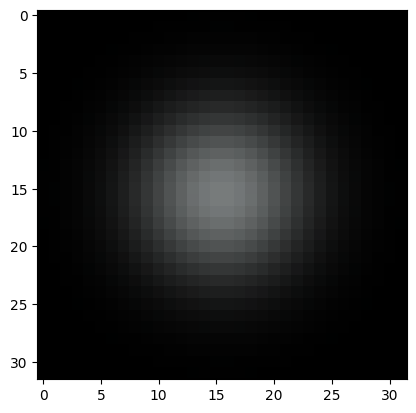

In [13]:
gaussians = return_gaussians()


optimizer = Adam([
    gaussians.points,
    gaussians.colors,
    gaussians.scales,
    gaussians.quaternions,
    gaussians.opacity,
], lr=0.001)


pbar = tqdm.tqdm(range(500))
for i in pbar:
    gaussian_scene = GaussianScene2(gaussians=gaussians)
    preprocessed_gaussians = preprocess_for_gaussian_scene(camera, gaussian_scene)

    output_scene = gaussian_scene.render_cuda(
        preprocessed_gaussians=preprocessed_gaussians.clone(),
        height=camera.height,
        width=camera.width,
        tile_size=16,
    )
    final_output = torch.zeros_like(output_scene)
    final_output = output_scene

    loss_value = loss(final_output, gt_image.float())
    print(f"I: {i}. Loss value", loss_value.item())
    loss_value.backward()
    optimizer.step()
    optimizer.zero_grad(set_to_none=True)

plt.imshow(final_output.detach().cpu().numpy())
plt.show()

In [14]:
gaussians.colors

tensor([[0.7026, 0.7272, 0.7280],
        [0.1080, 0.1547, 0.2008]], device='cuda:0', requires_grad=True)

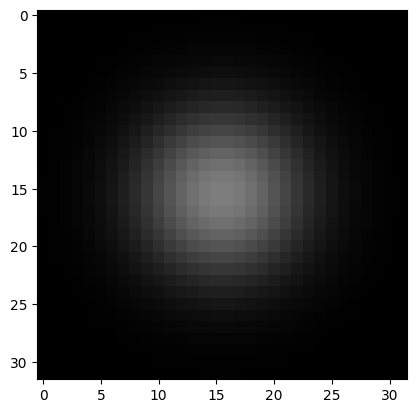

In [15]:
plt.imshow(gt_image.detach().cpu().numpy())
plt.show()

In [6]:
torch.allclose(output_auto1, output_scene)

False

In [7]:
# Find pixel location with maximum difference between images
diff = torch.abs(output_scene - output_auto1)
max_diff = torch.max(diff.sum(dim=-1))  # Sum across color channels
max_diff_idx = torch.argmax(diff.sum(dim=-1))  # Get flattened index

# Convert flat index to 2D coordinates
h = max_diff_idx // camera.width
w = max_diff_idx % camera.width

print(f"Maximum difference occurs at pixel ({h}, {w})")
print(f"Scene value: {output_scene[h,w]}")
print(f"Auto value: {output_auto1[h,w]}")


/var/tmp/ipykernel_45314/1678247111.py:7: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  h = max_diff_idx // camera.width


Maximum difference occurs at pixel (16, 12)
Scene value: tensor([0.1783, 0.2552, 0.3286], device='cuda:0', grad_fn=<SelectBackward0>)
Auto value: tensor([0.1783, 0.2552, 0.3286], device='cuda:0', grad_fn=<SelectBackward0>)
